# Time Shift Detection and Fixing

This notebook illustrates the usage of the `fix_time_shifts` function. This algorithm determines if the time stamps provided with the data have "shifted" at any point and then corrects the shift if found. These shifts can often be caused by incorrect handling of daylight savings time, but can come from other sources as well. They are best visualized by viewing the 2D time series data as an image.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('..')
from solardatatools.matrix_embedding import make_2d
from solardatatools.time_axis_manipulation import fix_time_shifts
from solardatatools.data_filling import zero_nighttime, interp_missing
from solardatatools.dataio import get_pvdaq_data
from solardatatools.plotting import plot_2d

/Users/bennetm/miniconda3/envs/pvi/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.kde module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df1 = get_pvdaq_data(sysid=1199, year=[2015, 2016, 2017], api_key='DEMO_KEY')

In [3]:
D = interp_missing(zero_nighttime(make_2d(df1, key='dc_power')))

Use the providing plotting function to view the 2D representation of the power data. Power output is representated by the color of the pixel. 

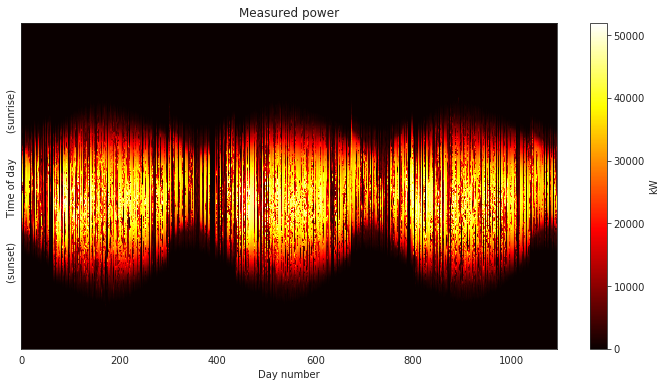

In [4]:
plot_2d(D);

In [5]:
Dfixed, ixs = fix_time_shifts(D, verbose=True, return_ixs=True, c1=1, c2=500, solar_noon_estimator='com')
ixs

array([  62,  300,  435,  673,  788, 1037])

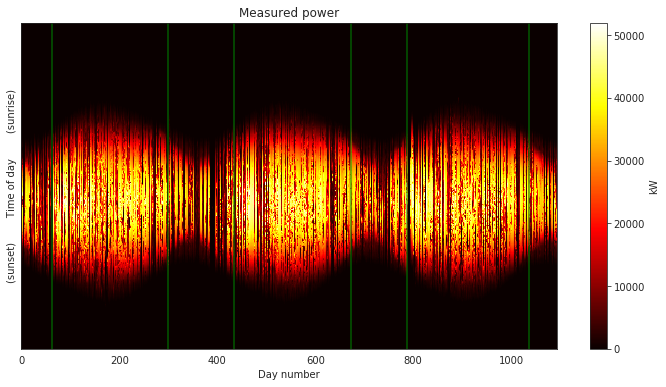

In [6]:
_ = plot_2d(Dfixed)
if len(ixs) > 0:
    for ix in ixs:
        plt.axvline(ix, color='green', alpha=0.7)

Next, we show that the algorithm correctly determines that there are no time shifts in a clean data set.

In [7]:
df2 = get_pvdaq_data(sysid=35, year=[2011, 2012, 2013], api_key='DEMO_KEY')

In [8]:
D = interp_missing(zero_nighttime(make_2d(df2, key='dc_power')))

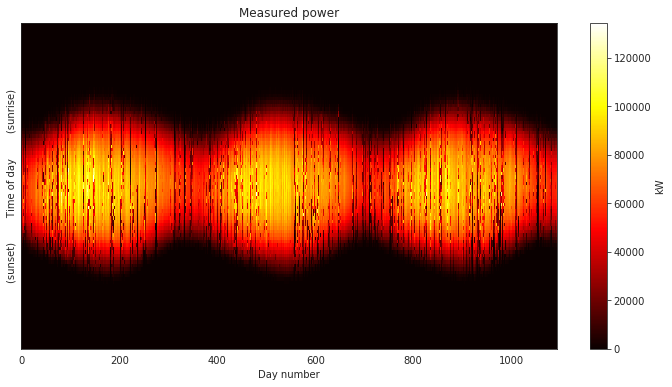

In [9]:
plot_2d(D);

In [10]:
Dfixed, ixs = fix_time_shifts(D, verbose=True, return_ixs=True, c1=1, c2=500, solar_noon_estimator='com')
ixs

array([], dtype=int64)